# 6.5 Machine Learning

### This script contains the following:

#### 1. Importing libraries and data and dropping columns
#### 2. The elbow technique
#### 3. k-means clustering

#### 1. Importing libraries and data and dropping columns

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define path

path = r'C:\Users\H539822\Desktop\Airbnb_Amsterdam'

In [4]:
# Import .csv

listings_merge = pd.read_csv(os.path.join(path, 'listings_merge.csv'))

In [5]:
listings_merge.shape

(20030, 35)

In [13]:
listings_merge.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'property_type',
       'accommodates', 'maximum_nights', 'listing_url', 'host_is_superhost',
       'host_about', 'host_response_time', 'host_response_rate', 'street',
       'weekly_price', 'monthly_price', 'market'],
      dtype='object')

In [22]:
listings_merge = listings_merge.drop(columns = ['host_response_time', 'last_review','host_is_superhost', 'host_about', 'market','name', 'host_name', 'neighbourhood', 'room_type', 'property_type', 'listing_url', 'street', 'first_review', 'review_scores_value', 'review_scores_cleanliness', 'review_scores_location', 'review_scores_accuracy', 'review_scores_communication', 'review_scores_checkin', 'review_scores_rating'])

In [26]:
listings_merge = listings_merge.drop(columns = ['weekly_price', 'monthly_price'])

In [31]:
listings_merge = listings_merge.drop(columns = ['host_response_rate'])

In [32]:
listings_merge

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,accommodates,maximum_nights
0,2818,3159,52.365755,4.941419,59,3,248,2.10,1,44,2,15
1,3209,3806,52.390225,4.873924,160,4,42,1.03,1,47,5,20
2,20168,59484,52.365087,4.893541,80,1,233,2.18,2,198,2,1000
3,25428,56142,52.373114,4.883668,125,14,1,0.09,2,141,3,60
4,27886,97647,52.386727,4.892078,150,2,171,2.03,1,199,2,730
...,...,...,...,...,...,...,...,...,...,...,...,...
20025,30576148,13399651,52.345999,4.952145,340,7,0,0.00,1,11,4,12
20026,30577727,1595885,52.362412,4.932467,150,3,0,0.00,2,16,3,14
20027,30578037,87866499,52.362431,4.926912,80,10,0,0.00,2,210,2,22
20028,30579673,1595885,52.363780,4.932493,55,2,0,0.00,2,31,2,15


#### 2. The elbow technique

In [33]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [34]:
score = [kmeans[i].fit(listings_merge).score(listings_merge) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\H539822\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\H539822\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\H539822\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\H539822\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\H539822\Anaconda\lib\site-packages\sklearn\

[-6.5400143664072425e+19,
 -1.6483093778966536e+19,
 -7.827929095682598e+18,
 -4.711548264953878e+18,
 -3.2944893925470515e+18,
 -2.6892014644198774e+18,
 -2.1220577291560535e+18,
 -1.7689064132193551e+18,
 -1.5018015252680986e+18]

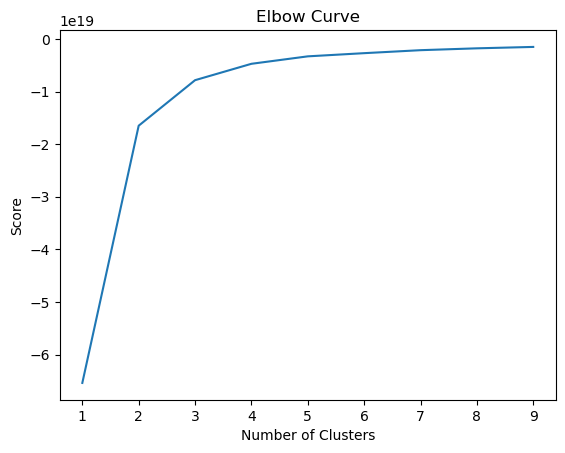

In [35]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

##### I will chosee 3 cluster, even if is not a so clear breaking point after that point it flatten more

#### 3. k-means clustering

In [36]:
# Create the k-means object.

kmeans = KMeans(n_clusters=3) 

In [37]:
# Fit the k-means object to the data.

kmeans.fit(listings_merge)

C:\Users\H539822\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [38]:
listings_merge['clusters'] = kmeans.fit_predict(listings_merge)

C:\Users\H539822\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [39]:
listings_merge

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,accommodates,maximum_nights,clusters
0,2818,3159,52.365755,4.941419,59,3,248,2.10,1,44,2,15,0
1,3209,3806,52.390225,4.873924,160,4,42,1.03,1,47,5,20,0
2,20168,59484,52.365087,4.893541,80,1,233,2.18,2,198,2,1000,0
3,25428,56142,52.373114,4.883668,125,14,1,0.09,2,141,3,60,0
4,27886,97647,52.386727,4.892078,150,2,171,2.03,1,199,2,730,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20025,30576148,13399651,52.345999,4.952145,340,7,0,0.00,1,11,4,12,0
20026,30577727,1595885,52.362412,4.932467,150,3,0,0.00,2,16,3,14,0
20027,30578037,87866499,52.362431,4.926912,80,10,0,0.00,2,210,2,22,2
20028,30579673,1595885,52.363780,4.932493,55,2,0,0.00,2,31,2,15,0


In [40]:
listings_merge['clusters'].value_counts()

0    12937
2     4466
1     2627
Name: clusters, dtype: int64

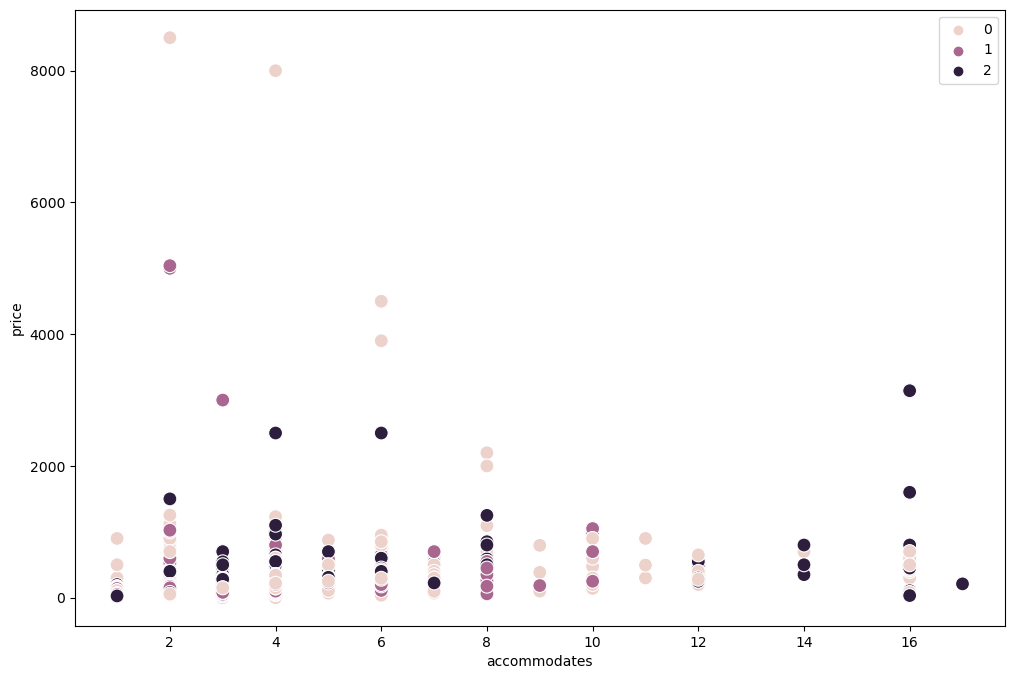

In [49]:
# Plot the clusters for the "accommodates" and "price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=listings_merge['accommodates'], y=listings_merge['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('accommodates') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.show()

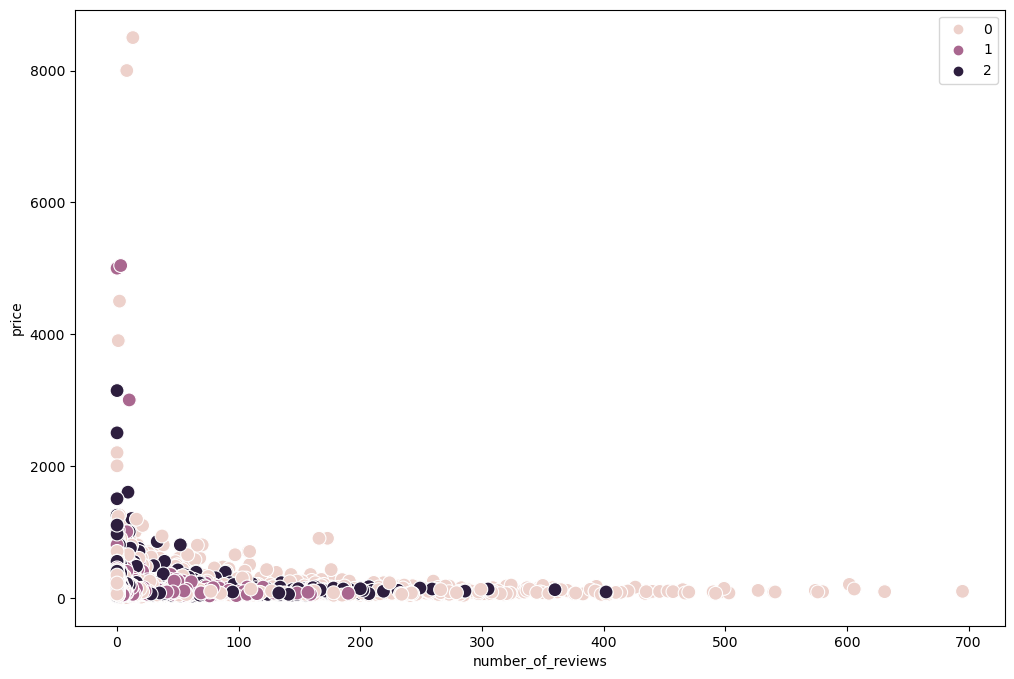

In [50]:
# Plot the clusters for the "accommodates" and "price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=listings_merge['number_of_reviews'], y=listings_merge['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('number_of_reviews') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.show()

##### The most usefull information we can get from here is about price is higher with more people accommodating but I think I really need to explore the data more to make a solid inference of the data set.

### Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

In [51]:
# renaming the clusters 
listings_merge.loc[listings_merge['clusters'] == 2, 'cluster'] = 'dark purple'
listings_merge.loc[listings_merge['clusters'] == 1, 'cluster'] = 'purple'
listings_merge.loc[listings_merge['clusters'] == 0, 'cluster'] = 'pink'

In [52]:
listings_merge.groupby('cluster').agg({'price':['mean', 'median'], 
                              'number_of_reviews':['mean', 'median'], 
                              'accommodates':['mean', 'median']})

price        number_of_reviews        accommodates       
                   mean median              mean median         mean median
cluster                                                                    
dark purple  151.534035  125.0         16.821093    7.0     2.905284    2.0
pink         151.316920  125.0         25.551983   10.0     2.880730    2.0
purple       157.537495  134.0          9.960792    4.0     2.924248    2.0

### Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

#### For price, dark purple and pink clusters are basically the same mean and median. Might have to reevulate the different variables in the dataset to suit the needs of the exercise.

### Propose what these results could be useful for in future steps of an analytics pipeline.

#### this give me an idea about the preferences and how market see how far the neighborhoods are from the city centre since a lot of people like this preferences to be close proximity.